In [38]:
%pip install -r requirements.txt


In [39]:
import pandas as pd 
import chardet
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:

#Gettting the character format
base = open(r'data/IPRESS.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'MacRoman'

In [41]:
# Geographical information of mining

hospitals = pd.read_csv("data/IPRESS.csv", encoding="latin-1")
# o
# hospitals = pd.read_csv("IPRESS.csv", encoding="cp1252")
hospitals.head(5)


,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS
0,PRIVADO,16618,SONRIE MAS,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTIAGO DE SURCO,150140,"AV. CAMINOS DEL INCA 2028 OF.201, URBANIZACION...",...,11/03/2013,GILBERTO MARTIN AQUIJE GAVILAN,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
3,PRIVADO,19555,DENTOCAPLINA,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,TACNA,TACNA,TACNA,230101,AV.LEGUIA 1892,...,30/12/2014,BYANCA LISSETTE ARANDA LANCHIPA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
4,OTRO,18792,MEDICO DE FAMILIA MANTARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,TARMA,TARMA,120701,JR. ROSA ZAPATEL S/N - BARRIO MANTARA - TARMA,...,06/07/2014,LILIAN DENISE ADAUTO DE LA CRUZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN


In [42]:
print(hospitals.columns)

Index(['Institución', 'Código Único', 'Nombre del establecimiento',
       'Clasificación', 'Tipo', 'Departamento', 'Provincia', 'Distrito',
       'UBIGEO', 'Dirección', 'Código DISA', 'Código Red', 'Código Microrred',
       'DISA', 'Red', 'Microrred', 'Código UE', 'Unidad Ejecutora',
       'Categoria', 'Teléfono', 'Tipo Doc.Categorización',
       'Nro.Doc.Categorización', 'Horario', 'Inicio de Actividad',
       'Director Médico y/o Responsable de la Atención de Salud', 'Estado',
       'Situación', 'Condición', 'Inspección', 'NORTE', 'ESTE', 'COTA',
       'CAMAS'],
      dtype='object')


In [43]:
hospitals.iloc[30:40, 20:30]

,Tipo Doc.Categorización,Nro.Doc.Categorización,Horario,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE
30,RESOLUCIÓN,NaN,9:00 a 20:00,13/09/2007,JULIO ERNESTO AMADO RAMIREZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
31,RESOLUCIÓN,NaN,8:00 - 14:00,06/06/1970,FREDY JOSE RODRIGUEZ MANCILLA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
32,RESOLUCIÓN,N° 574-2014-GOREMAD/DRS-DG,24 HORAS,01/01/2000,FREDY JOSE RODRIGUEZ MANCILLA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
33,RESOLUCIÓN,NaN,8:00 - 20:00,15/04/2001,DANTE ELOY RAMOS TELLO,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
34,RESOLUCIÓN,787-2015,6 HORAS,27/05/1986,OFELIA HAYDEE MERMA HUACO,ACTIVADO,,EN FUNCIONAMIENTO,,-71.466486
35,RESOLUCIÓN,0522-05-RG-ANCASH-DIRES/DIPER,24 HORAS,01/01/1900,MAGALY MIRTHA SUAREZ ACEVEDO,ACTIVADO,,EN FUNCIONAMIENTO,,-77.649385
36,RESOLUCIÓN,NaN,16:00 - 22:00 HRS,18/08/2014,MAGALY MIRTHA SUAREZ ACEVEDO,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
37,RESOLUCIÓN,NaN,LUNES A VIERNES DE 9,01/08/2013,JUAN MARTIN BOLO DIESTRA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
38,RESOLUCIÓN,NaN,LUNES A SABADO 8:00,15/03/2014,JUAN MARTIN BOLO DIESTRA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN
39,RESOLUCIÓN,NaN,8:00 - 20:00,18/10/1992,SILVIA AURORA TORREJON GOMEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-77.962879


In [44]:
hospitals["Condición"].value_counts()


Condición
EN FUNCIONAMIENTO           20800
INOPERATIVO                    17
CIERRE TEMPORAL                 1
RESTRICCIÓN DE SERVICIOS        1
Name: count, dtype: int64

In [45]:
hospitals["Estado"].value_counts()

Estado
ACTIVADO    20819
Name: count, dtype: int64

In [46]:
df = hospitals[hospitals["Condición"] == "EN FUNCIONAMIENTO"]

In [47]:
df.shape

(20800, 33)

In [48]:
df.rename(columns={"NORTE": "LONGITUD", "ESTE": "LATITUD"}, inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_22908\3635576473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"NORTE": "LONGITUD", "ESTE": "LATITUD"}, inplace=True)


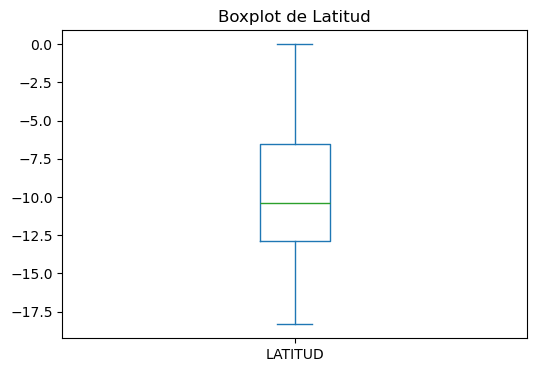

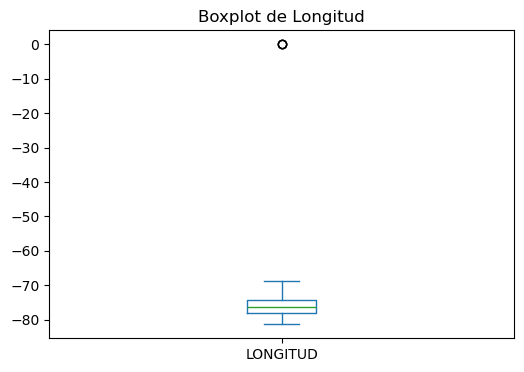

In [49]:
import matplotlib.pyplot as plt

# Boxplot de latitudes
plt.figure(figsize=(6,4))
df["LATITUD"].plot(kind="box")
plt.title("Boxplot de Latitud")
plt.show()

# Boxplot de longitudes
plt.figure(figsize=(6,4))
df["LONGITUD"].plot(kind="box")
plt.title("Boxplot de Longitud")
plt.show()


In [50]:
df = df[df["LONGITUD"] < -60]

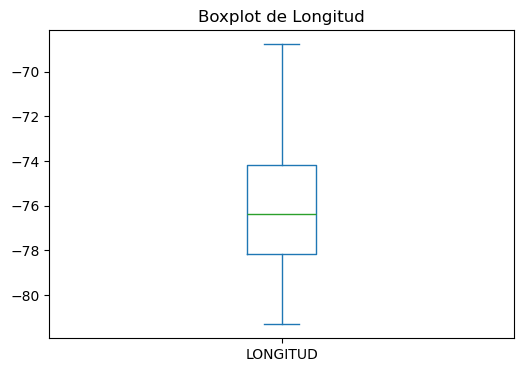

In [51]:
# Boxplot de longitudes
plt.figure(figsize=(6,4))
df["LONGITUD"].plot(kind="box")
plt.title("Boxplot de Longitud")
plt.show()

In [52]:
df.isnull().sum()

Institución                                                   0
Código Único                                                  0
Nombre del establecimiento                                    0
Clasificación                                                 5
Tipo                                                          0
Departamento                                                  0
Provincia                                                     0
Distrito                                                      0
UBIGEO                                                        0
Dirección                                                     0
Código DISA                                                   0
Código Red                                                    0
Código Microrred                                              0
DISA                                                          0
Red                                                           0
Microrred                               

In [53]:
maps = gpd.read_file("data/shape_file_distritos_clase/DISTRITOS.shp")
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [54]:
# Select only relevant columns

maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [55]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [56]:
# Ensure the dataset is in WGS-84 (EPSG:4326)
maps = maps.to_crs(epsg=4326)
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

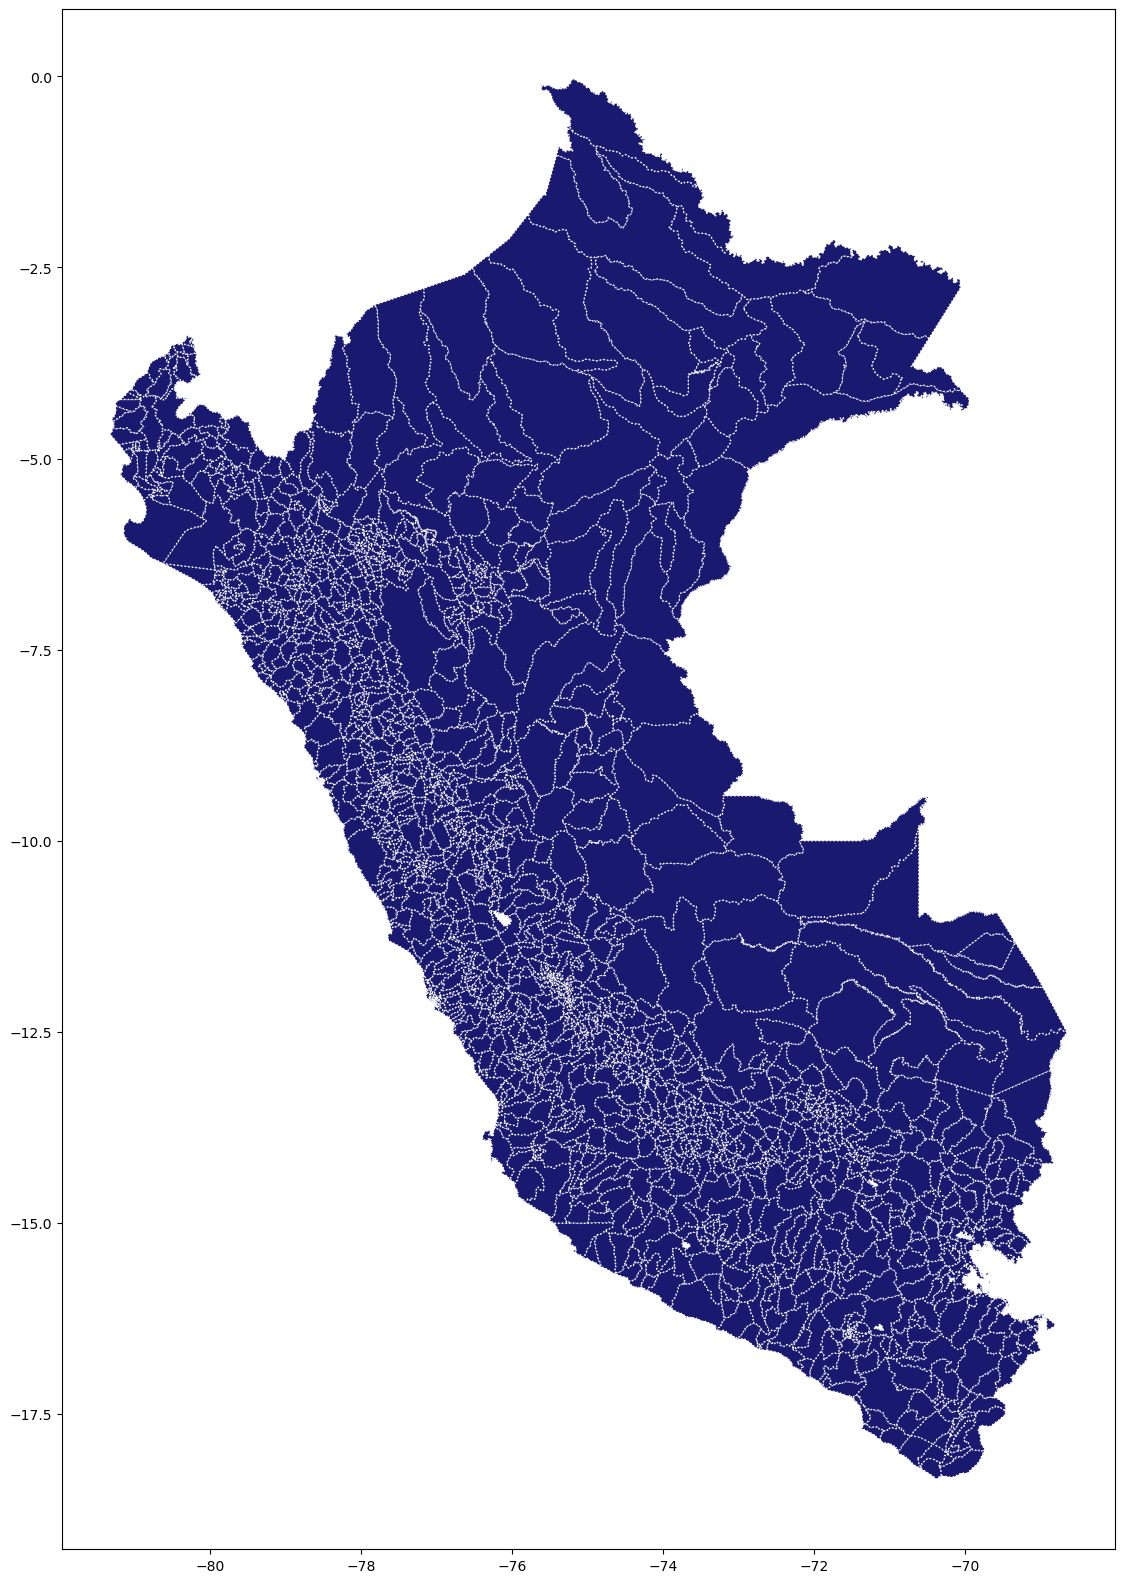

In [57]:
# Plot using geopandas

#figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='white' )
plt.show()

In [58]:
import pandas as pd
import geopandas as gpd

# 3. Contar hospitales por UBIGEO
counts = df.groupby("UBIGEO").size().rename("Hosp_Count").reset_index()

# 4. Unir con shapefile de distritos
districts_counts = maps.merge(counts, on="UBIGEO", how="left")

# 5. Rellenar distritos sin hospitales con 0
districts_counts["Hosp_Count"] = districts_counts["Hosp_Count"].fillna(0).astype(int)

# 6. Exportar resultados
districts_counts.to_file("data/districts_with_hospitals.gpkg", driver="GPKG")


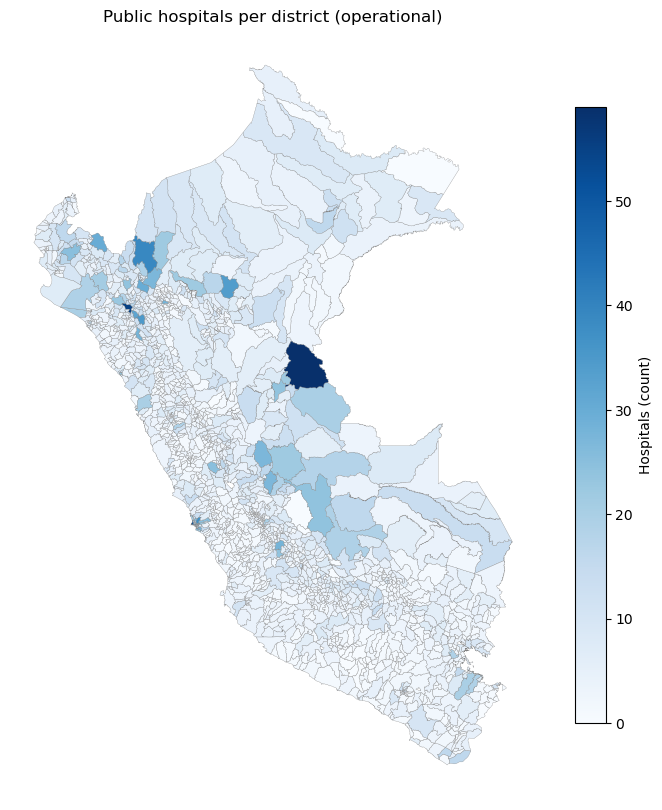

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot covid infection at disctrict level 
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
districts_counts.plot(
    column="Hosp_Count",
    cmap="Blues",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={"label": "Hospitals (count)", "shrink": 0.8},
    ax=ax,
)
ax.set_title("Public hospitals per district (operational)")
ax.axis("off")
plt.show()
plt.savefig(r'assets/hospitals_per_district.png', dpi=300)


In [60]:
df.groupby("UBIGEO").size().rename("Hosp_Count").reset_index().sort_values("Hosp_Count", ascending=False).head(10)

,UBIGEO,Hosp_Count
1796,250101,59
587,60601,55
659,70101,51
1081,120606,39
25,10205,39
1264,150132,37
602,60701,35
1407,160201,34
560,60401,32
75,10701,30


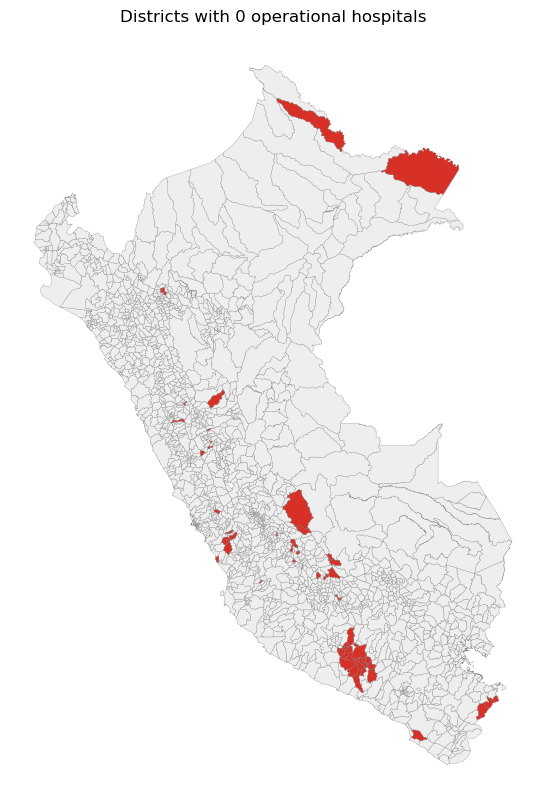

<Figure size 640x480 with 0 Axes>

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Pinta todos los distritos en gris claro
districts_counts.plot(color="#eeeeee", edgecolor="grey", linewidth=0.2, ax=ax)

# Resalta en rojo los distritos con 0 hospitales
districts_counts[districts_counts["Hosp_Count"] == 0].plot(
    color="#d73027", edgecolor="grey", linewidth=0.2, ax=ax
)

ax.set_title("Districts with 0 operational hospitals")
ax.axis("off")
plt.show()

plt.savefig(r'assets/hospitals_zero.png', dpi=300)


In [62]:
top_10 = df.groupby("UBIGEO").size().rename("Hosp_Count").reset_index().sort_values("Hosp_Count", ascending=False).head(10)
top_10

,UBIGEO,Hosp_Count
1796,250101,59
587,60601,55
659,70101,51
1081,120606,39
25,10205,39
1264,150132,37
602,60701,35
1407,160201,34
560,60401,32
75,10701,30


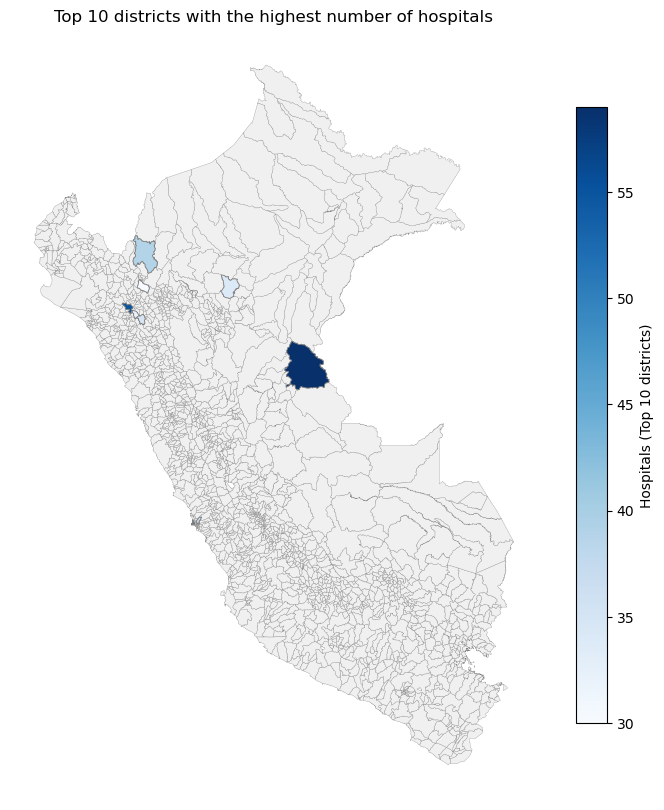

<Figure size 640x480 with 0 Axes>

In [63]:
top10_ids = top_10["UBIGEO"].tolist()

# Crear una columna booleana para identificar Top 10
districts_counts["Top10"] = districts_counts["UBIGEO"].isin(top10_ids)

# 2. Graficar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Fondo: todos los distritos en gris claro
districts_counts.plot(color="#f0f0f0", edgecolor="grey", linewidth=0.2, ax=ax)

# Top 10: resaltar con escala de colores según Hosp_Count
districts_counts[districts_counts["Top10"]].plot(
    column="Hosp_Count",
    cmap="Blues",
    linewidth=0.6,
    edgecolor="grey",
    legend=True,
    legend_kwds={"label": "Hospitals (Top 10 districts)", "shrink": 0.8},
    ax=ax,
)

ax.set_title("Top 10 districts with the highest number of hospitals")
ax.axis("off")
plt.show()
plt.savefig(r'assets/hospitals_top_10_.png', dpi=300)



In [64]:
# task 2
dep_count = df.groupby("Departamento").size().rename("Hosp_Count").reset_index().sort_values("Hosp_Count", ascending=False)
print(dep_count)

     Departamento  Hosp_Count
5       CAJAMARCA         845
14           LIMA         774
11          JUNIN         493
19          PIURA         442
0        AMAZONAS         417
1          ANCASH         416
20           PUNO         405
4        AYACUCHO         387
21     SAN MARTIN         379
2        APURIMAC         374
15         LORETO         351
7           CUSCO         339
12    LA LIBERTAD         336
8    HUANCAVELICA         325
9         HUANUCO         261
18          PASCO         258
24        UCAYALI         234
3        AREQUIPA         224
13     LAMBAYEQUE         181
10            ICA         146
6          CALLAO          97
22          TACNA          79
16  MADRE DE DIOS          66
17       MOQUEGUA          56
23         TUMBES          54


In [65]:
# Cajamarca (845 hospitals) and Tumbes (54 hospitals)

In [66]:
# 2. Gráfico de barras
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\diego\AppData\Local\Temp\ipykernel_22908\3264341808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


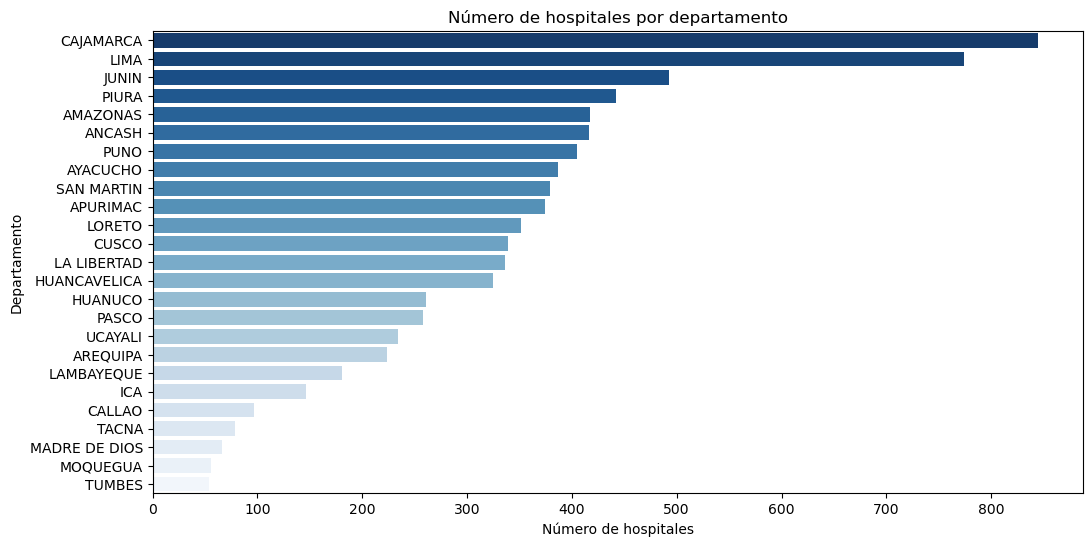

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(
    data= dep_count,
    x="Hosp_Count",
    y="Departamento",
    palette="Blues_r"
)
plt.title("Número de hospitales por departamento")
plt.xlabel("Número de hospitales")
plt.ylabel("Departamento")
plt.show()

In [70]:
dep = gpd.read_file("data/shape_file_distritos_clase/DISTRITOS.shp")
dep = dep[['DEPARTAMEN', 'geometry']]
dep = dep.rename({'DEPARTAMEN':'Departamento'}, axis =1 )
dep

,Departamento,geometry
0,HUANUCO,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,HUANUCO,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,UCAYALI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,UCAYALI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,UCAYALI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,HUANUCO,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,HUANUCO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,HUANUCO,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,PUNO,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


<Axes: >

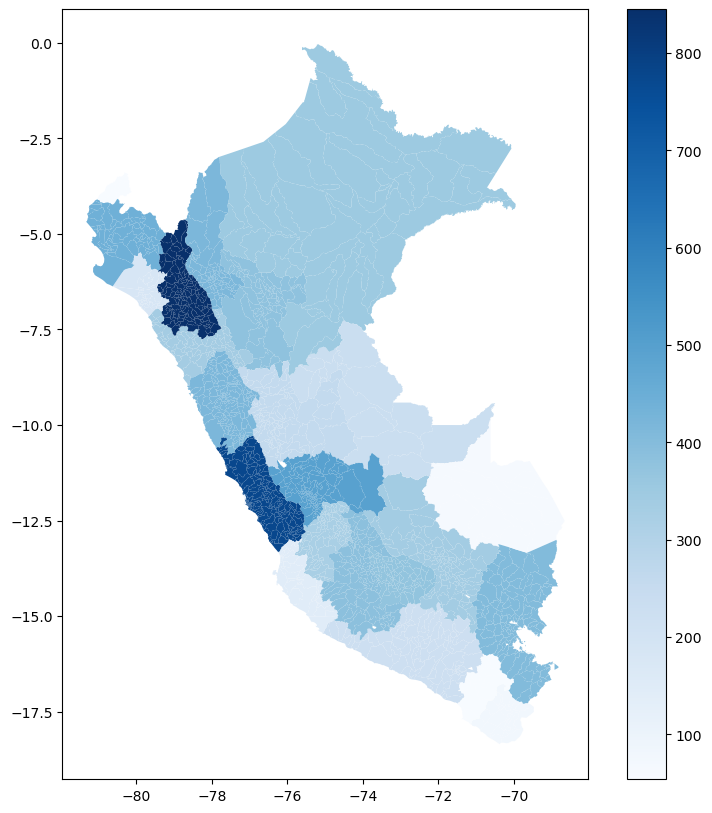

In [72]:
# Unir con el shapefile disuelto
dept_map = dep.merge(dep_count, on="Departamento", how="left")

# Visualizar
dept_map.plot(column="Hosp_Count", cmap="Blues", legend=True, figsize=(10,10))

